In [86]:
#### Boston data / column description
# neighborhood   Name of the Boston neighborhood (location of the census tract)
# mv          	Median value of homes in thousands of 1970 dollars
# nox          	Air pollution (nitrogen oxide concentration)
# crim          	Crime rate
# zn          	Percent of land zoned for lots
# indus          	Percent of business that is industrial or nonretail
# chas          	On the Charles River (1) or not (0)
# rooms          	Average number of rooms per home
# age          	Percentage of homes built before 1940
# dis          	Weighted distance to employment centers
# rad          	Accessibility to radial highways
# tax          	Tax rate
# ptratio      	Pupil/teacher ratio in public schools
# lstat       	Percentage of population of lower socio-economic status

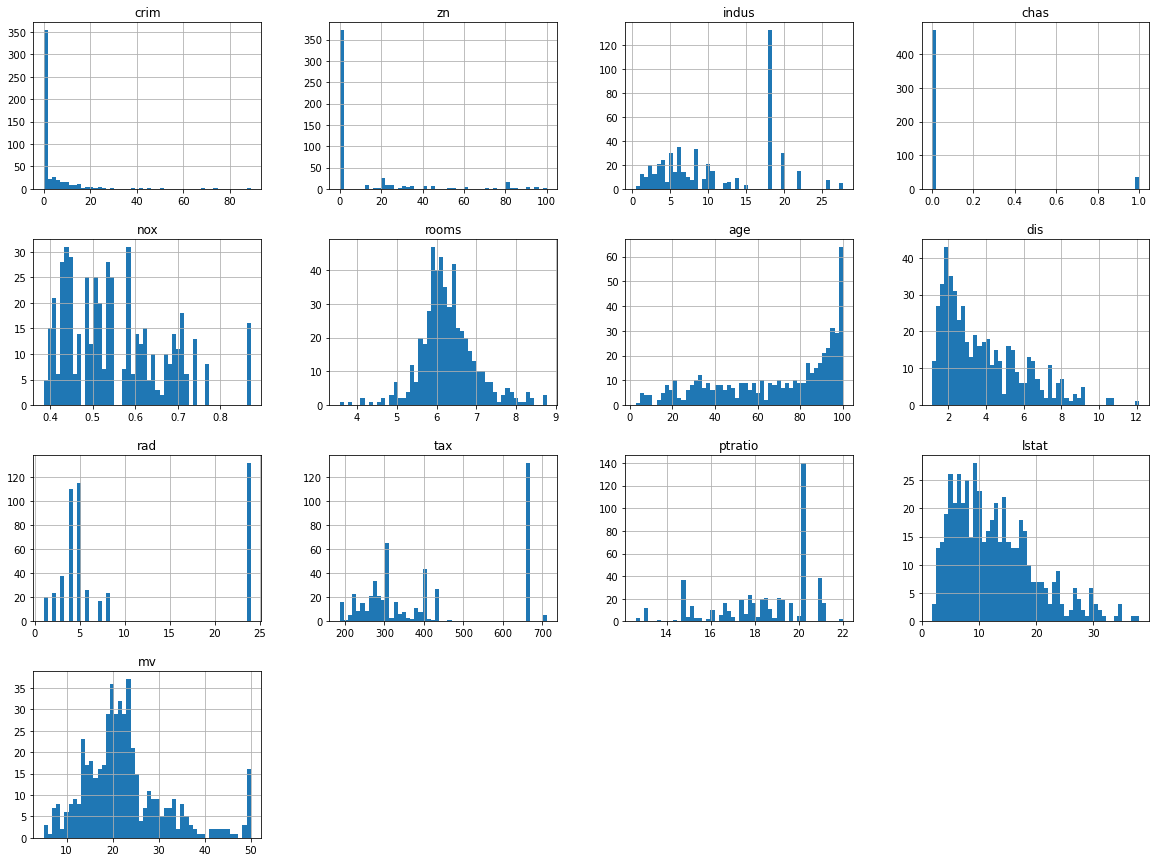

In [87]:
%matplotlib inline   
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
housing = pd.read_csv('boston.csv')

housing.hist(bins=50, figsize=(20,15))
plt.show()

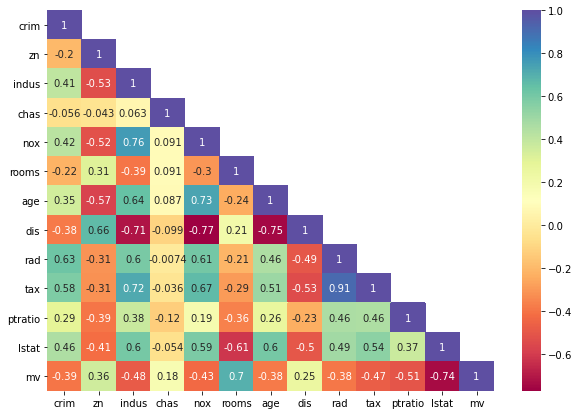

In [88]:
# Correlation between Features/Target value
fig, ax = plt.subplots(figsize=(10,7))
corr = housing.corr()
# np.tril(np.ones(corr.shape)).astype(np.bool)[0:5,0:5]
df_lt = corr.where(np.tril(np.ones(corr.shape)).astype(np.bool))
sns.heatmap(df_lt, annot=True, cmap="Spectral", fmt='.2g')
plt.show()

<AxesSubplot:>

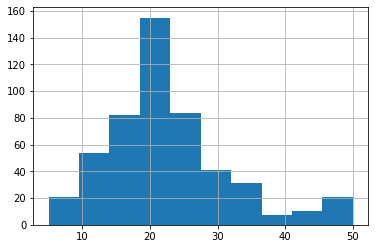

In [89]:
# Distribution of median housing value
housing["mv"].hist()

<AxesSubplot:xlabel='lstat', ylabel='mv'>

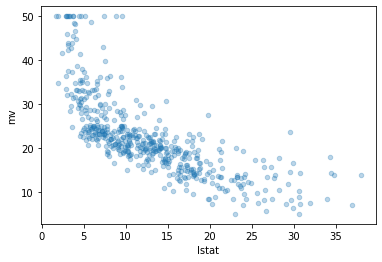

In [90]:
housing.plot(kind="scatter", x="lstat", y="mv", alpha = 0.3)

In [91]:
# Correlation sorted by value to understand which features are highly positively / negatively correlated.
corr_matrix = housing.corr()
corr_matrix["mv"].sort_values(ascending=False)

mv         1.000000
rooms      0.696304
zn         0.360386
dis        0.249315
chas       0.175663
age       -0.377999
rad       -0.384766
crim      -0.389582
nox       -0.429300
tax       -0.471979
indus     -0.484754
ptratio   -0.505655
lstat     -0.740836
Name: mv, dtype: float64

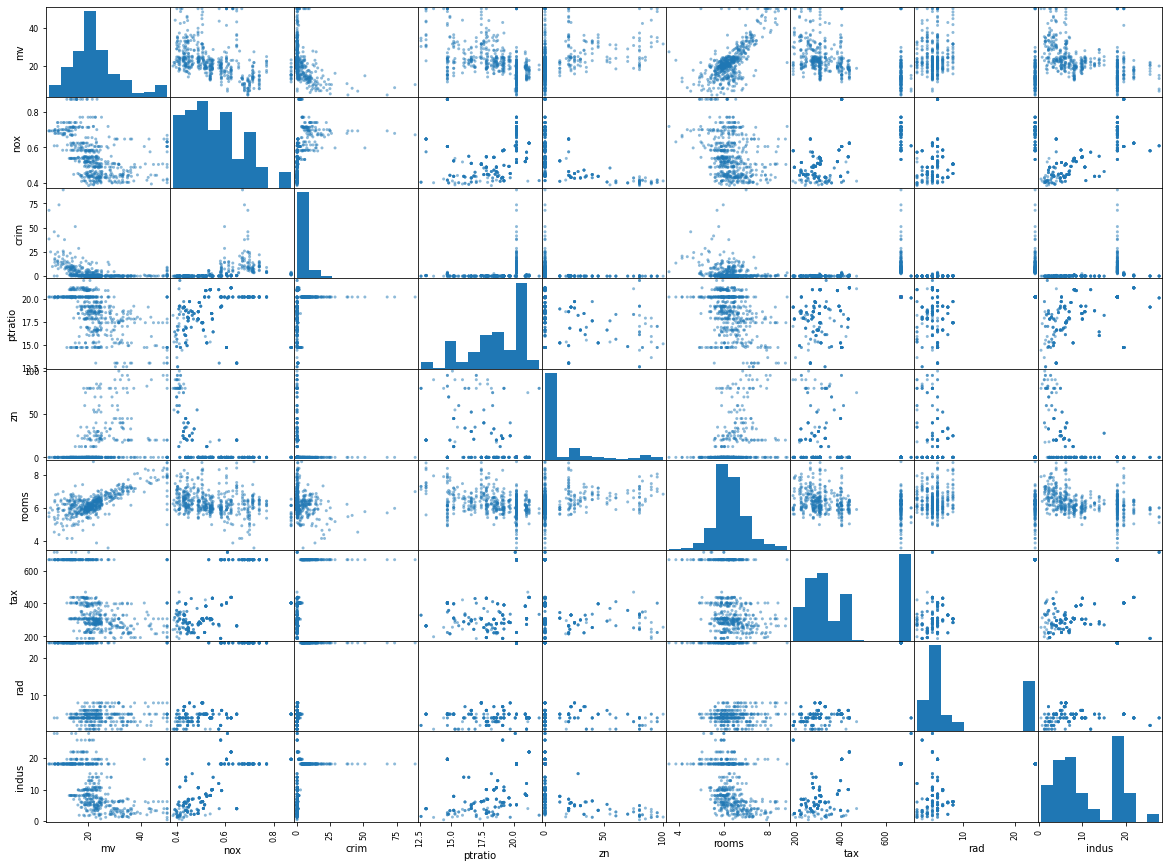

In [92]:
from pandas.plotting import scatter_matrix

attributes = ["neighborhood", "mv", "nox", "crim", "ptratio", "zn", "rooms", "tax", "rad",
              "indus"]
scatter_matrix(housing[attributes], figsize=(20, 15))
plt.show()

<AxesSubplot:xlabel='rooms', ylabel='mv'>

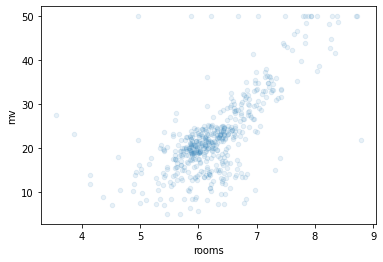

In [93]:
housing.plot(kind="scatter", x="rooms", y="mv",
             alpha=0.1)

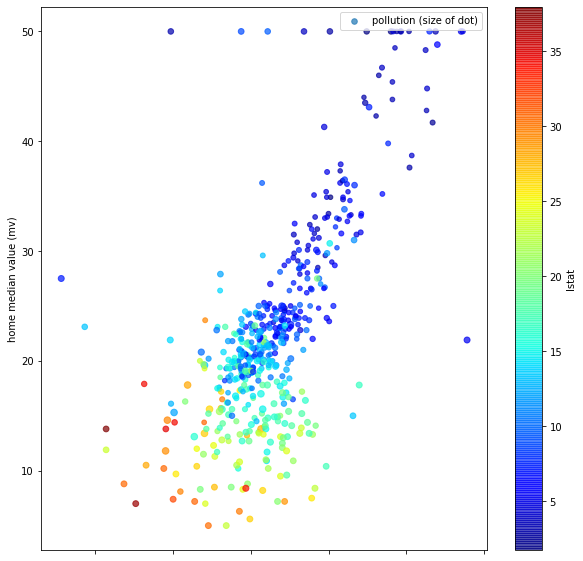

In [94]:
ax = housing.plot(kind="scatter", x="rooms", y="mv", alpha=0.7,
    s=housing["nox"]*50, label="pollution (size of dot)", figsize=(10,10),
    c="lstat", cmap=plt.get_cmap("jet"), colorbar=True,
)
ax.set_ylabel("home median value (mv)")
ax.set_xlabel("rooms")
plt.show()

In [95]:
housing.describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [96]:
housing

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Winthrop,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,Winthrop,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,Winthrop,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,Winthrop,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [97]:
# 20% Test Size
from sklearn.model_selection import train_test_split
housing = pd.read_csv('boston.csv')
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [98]:
housing_train = train_set.drop(["neighborhood","mv"], axis=1)
housing_train_y = train_set["mv"].copy()
housing_test = test_set.drop(["neighborhood","mv"], axis=1)
housing_test_y = test_set["mv"].copy()

In [99]:
housing_train.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,11.28


In [100]:
housing_train_y

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: mv, Length: 404, dtype: float64

## Scaling explanatory variables

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

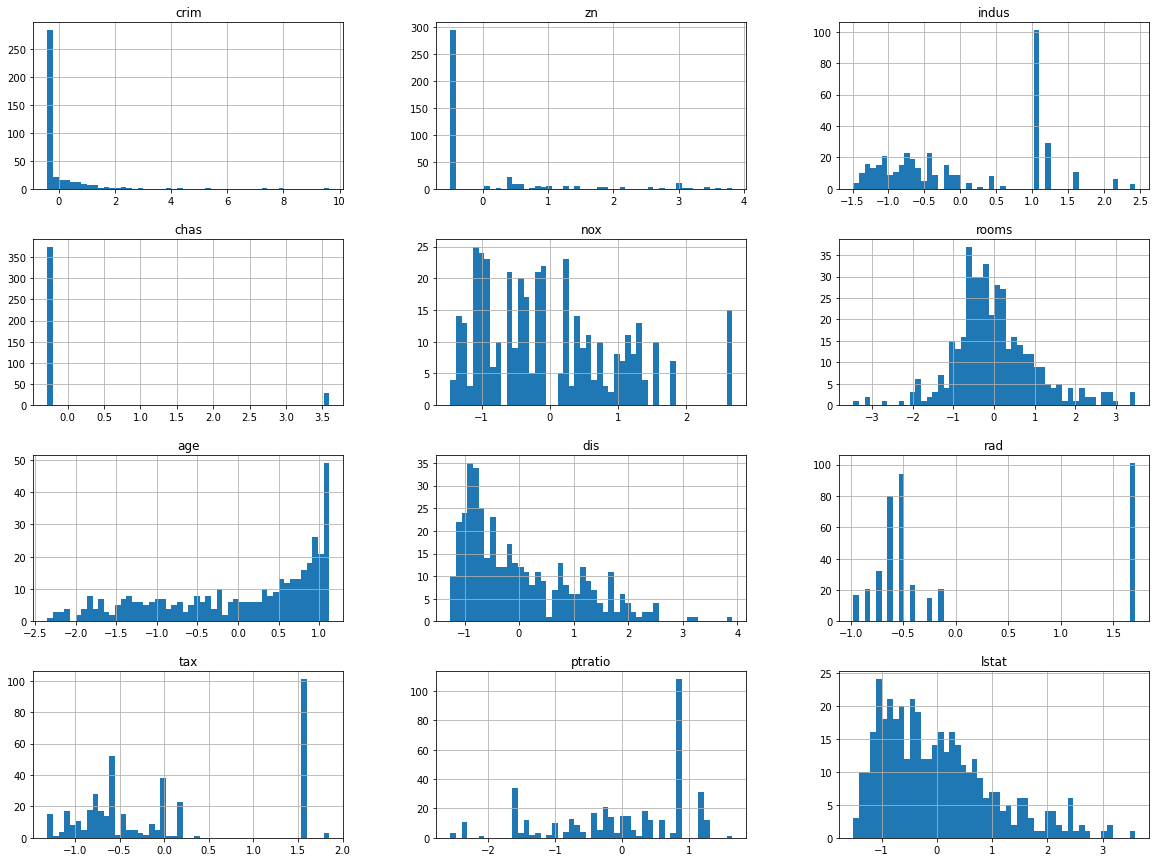

In [102]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

housing_train_scaled = num_pipeline.fit_transform(housing_train)
housing_test_scaled = num_pipeline.fit_transform(housing_test)
data = pd.DataFrame(housing_train_scaled)
data.columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']
data.hist(bins=50, figsize=(20,15))
plt.show()


### Linear Regression and RMSE

In [103]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_train_scaled, housing_train_y)

LinearRegression()

In [104]:
sample_prepared = num_pipeline.fit_transform(housing_train.iloc[:5])
print("Predictions:", lin_reg.predict(sample_prepared))


Predictions: [10.90564306 24.7201385  33.05133096 21.98012068 23.35143016]


In [105]:
print("Labels:", list(housing_train_y.iloc[:5]))

Labels: [12.0, 19.9, 19.4, 13.4, 18.2]


In [106]:
from sklearn.metrics import mean_squared_error, r2_score
def score(X, y, model):
    housing_predictions = model.predict(X)
    mse = mean_squared_error(y, housing_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, housing_predictions)
    print("RMSE : {}".format(round(rmse,4)))
    print("R2_SCORE : {}".format(round(r2,4)))

In [107]:
print("Linear Train scores")
score(housing_train_scaled, housing_train_y, lin_reg)
print("--------")
print("Linear Test scores")
score(housing_test_scaled, housing_test_y, lin_reg)

Linear Train scores
RMSE : 4.6969
R2_SCORE : 0.7447
--------
Linear Test scores
RMSE : 5.0987
R2_SCORE : 0.6475


In [108]:
col_names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']
lin_coeff = pd.DataFrame(zip(col_names, lin_reg.coef_))
lin_coeff.columns = ['feature', 'values']
lin_coeff.sort_values(['values'],ascending = False).reset_index(drop=True)

,feature,values
0,rooms,2.992982
1,rad,2.054351
2,chas,0.782190
3,zn,0.760239
4,indus,0.195806
5,age,-0.107367
6,crim,-1.120984
7,ptratio,-1.906187
8,tax,-1.951937
9,nox,-2.106760


In [109]:
def display_scores(scores):
    print("Scores:", scores)
    print(pd.Series((scores)).describe())
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [110]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, housing_train_scaled, housing_train_y,
                             scoring="neg_mean_squared_error", cv=10)
display_scores(np.sqrt(-lin_scores))

Scores: [3.98577367 4.24493363 5.49908431 6.55239777 4.57646111 5.09276928
 4.6874387  4.45610973 3.97868074 5.58740169]
count    10.000000
mean      4.866105
std       0.819767
min       3.978681
25%       4.297728
50%       4.631950
75%       5.397506
max       6.552398
dtype: float64
Mean: 4.866105063839283
Standard deviation: 0.7776992985373647


### Ridge Regression

In [111]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(housing_train_scaled, housing_train_y)

Ridge(alpha=1, random_state=42, solver='cholesky')

In [112]:
print("Ridge: Train scores")
score(housing_train_scaled, housing_train_y, ridge_reg)
print("--------")
print("Ridge: Test scores")
score(housing_test_scaled, housing_test_y, ridge_reg)

Ridge: Train scores
RMSE : 4.697
R2_SCORE : 0.7447
--------
Ridge: Test scores
RMSE : 5.0994
R2_SCORE : 0.6474


In [113]:
ridge_scores = cross_val_score(ridge_reg, housing_train_scaled, housing_train_y,
                             scoring="neg_mean_squared_error", cv=10)
display_scores(np.sqrt(-ridge_scores))

Scores: [3.99347328 4.23996371 5.49256413 6.55388557 4.58100711 5.0974087
 4.68366537 4.4490759  3.97015509 5.58513554]
count    10.000000
mean      4.864633
std       0.820317
min       3.970155
25%       4.292242
50%       4.632336
75%       5.393775
max       6.553886
dtype: float64
Mean: 4.864633440774183
Standard deviation: 0.7782212106594129


In [114]:
ridge_coeff = pd.DataFrame(zip(col_names, ridge_reg.coef_))
ridge_coeff.columns = ['feature', 'values']
ridge_coeff.sort_values(['values'],ascending = False).reset_index(drop=True)

,feature,values
0,rooms,3.001150
1,rad,1.976753
2,chas,0.785683
3,zn,0.740266
4,indus,0.170530
5,age,-0.109676
6,crim,-1.110754
7,tax,-1.879479
8,ptratio,-1.897419
9,nox,-2.075009


### Lasso Regression

In [115]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(housing_train_scaled, housing_train_y,)

Lasso(alpha=0.5)

In [116]:
print("Lasso: Train scores")
score(housing_train_scaled, housing_train_y, lasso_reg)
print("--------")
print("Lasso: Test scores")
score(housing_test_scaled, housing_test_y, lasso_reg)

Lasso: Train scores
RMSE : 5.0569
R2_SCORE : 0.704
--------
Lasso: Test scores
RMSE : 5.3361
R2_SCORE : 0.6139


In [117]:
lasso_scores = cross_val_score(lasso_reg, housing_train_scaled, housing_train_y,
                             scoring="neg_mean_squared_error", cv=10)
display_scores(np.sqrt(-lasso_scores))

Scores: [4.75760939 4.45864455 5.66349598 6.72138612 5.30124078 5.69446941
 5.2641694  4.28515211 4.03042567 5.82164706]
count    10.000000
mean      5.199824
std       0.824953
min       4.030426
25%       4.533386
50%       5.282705
75%       5.686726
max       6.721386
dtype: float64
Mean: 5.199824048363482
Standard deviation: 0.7826189710559508


In [118]:
lasso_coeff = pd.DataFrame(zip(col_names, lasso_reg.coef_))
lasso_coeff.columns = ['feature', 'values']
lasso_coeff.sort_values(['values'],ascending = False).reset_index(drop=True)

,feature,values
0,rooms,3.218119
1,chas,0.436123
2,zn,0.000000
3,indus,-0.000000
4,nox,-0.000000
5,age,-0.000000
6,rad,-0.000000
7,tax,-0.229442
8,dis,-0.348589
9,crim,-0.423237


### Elastic Net

In [119]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(housing_train_scaled, housing_train_y,)

ElasticNet(alpha=0.1, random_state=42)

In [120]:
print("Lasso: Train scores")
score(housing_train_scaled, housing_train_y, elastic_net)
print("--------")
print("Lasso: Test scores")
score(housing_test_scaled, housing_test_y, elastic_net)

Lasso: Train scores
RMSE : 4.7547
R2_SCORE : 0.7384
--------
Lasso: Test scores
RMSE : 5.1567
R2_SCORE : 0.6394


In [121]:
elastic_scores = cross_val_score(elastic_net, housing_train_scaled, housing_train_y,
                             scoring="neg_mean_squared_error", cv=10)
display_scores(np.sqrt(-elastic_scores))

Scores: [4.15906142 4.21776122 5.44929336 6.57168425 4.77992076 5.23980254
 4.72692173 4.34916071 3.89618602 5.58802755]
count    10.000000
mean      4.897782
std       0.820226
min       3.896186
25%       4.250611
50%       4.753421
75%       5.396921
max       6.571684
dtype: float64
Mean: 4.897781956403089
Standard deviation: 0.7781343834699799


In [122]:
elastic_coeff = pd.DataFrame(zip(col_names, elastic_net.coef_))
elastic_coeff.columns = ['feature', 'values']
elastic_coeff.sort_values(['values'],ascending = False).reset_index(drop=True)

,feature,values
0,rooms,3.116584
1,chas,0.792856
2,rad,0.669250
3,zn,0.363095
4,age,-0.048033
5,indus,-0.099825
6,tax,-0.788316
7,crim,-0.869893
8,nox,-1.471315
9,ptratio,-1.719999


In [123]:
# Boston Housing Study (Python)
# using data from the Boston Housing Study case
# as described in "Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python" (Miller 2015)

# Here we use data from the Boston Housing Study to evaluate
# regression modeling methods within a cross-validation design.

# program revised by Thomas W. Milller (2017/09/29)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.model_selection.KFold.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LinearRegression.html
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Ridge.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Lasso.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.ElasticNet.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.metrics.r2_score.html

# Textbook reference materials:
# Geron, A. 2017. a
# and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models
# has sections covering linear regression, polynomial regression,
# and regularized linear models. Sample code from the book is 
# available on GitHub at https://github.com/ageron/handson-ml

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

# import base packages into the namespace for this program
import numpy as np
import pandas as pd

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation

# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('boston.csv')

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())

print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())

# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())

print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())

# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T



boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

In [124]:

# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)

# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)



Data dimensions: (506, 13)
StandardScaler()
[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]

Dimensions for model_data: (506, 13)
